# 0. Описание задачи

## a) Введение

Инсульт - острое нарушение кровоснабжения головного мозг, характеризующееся внезапным (в течение нескольких минут, часов) появлением очаговой и/или общемозговой неврологической симптоматики. 

По данным Всемирной организации здравоохранения (ВОЗ) на 2011 год, инсульт занимал второе место среди причин смерти в мире (около 11% всех смертей). 

Есть ряд патологий, присутствие которых существенно увеличивает угрозу возникновения инсульта: 
    атеросклероз сосудов головного мозга; 
    мерцательная аритмия; 
    инфаркт миокарда;
    наличие предыдущего инсульта;
    почечная недостаточнойсть или дисфункция;
    высокое артериальное давление; 
    варикозная болезнь; 
    нарушение свертываемости крови; 
    сахарный диабет; 
    ожирение; 
    тромботические риски с полицитемией;
    малоподвижный образ жизни; 
    мужской пол;
    наследственная предрасположенность;
    курение, алкоголизм.

Поскольку в последние годы все больше людей ведут сидячий образ жизни, который зачастую сопуствует с переработкой, то риск возникновения данного заболевания увеличивается. Так, иссследование 2016 года (https://www.sciencedirect.com/science/article/pii/S0160412021002208), посвещенное анализу воздействия длительного рабочего дня в 194 странах показали, что продолжительный рабочий день (>55 часов в неделю) стал причиной смерти 745 000 человек в результате инсульта и ишемической болезни сердца в 2016 г., что на 29 процентов больше, чем в 2000 г. Этот эффект связанный с переработкой особенно велико среди мужчин (на них приходится 72% смертей). В исследовании делается вывод о том, что при работе в течение 55 или более часов в неделю риск инсульта повышается примерно на 35%, а риск ишемической болезни сердца – на 17% по сравнению с работой в течение 35‑40 часов в неделю.

В силу возрастающего риска возникновения инсульта, существует потребность в мониторинге здоровья людей с использованием некоторых биомаркеров. Факторы риска, описанные выше могут быть разделены на модифицируемые факторы, которые могут блокированы с помощью антитромботические препаратов, бета-блокаторов, изменения образа жизни, а также немодифицируемые факторы, такие как возраст, предыдущий инсульт, почечная недостаточность и т.п.

Таким образом, анализ состояния здоровья человека и его предрасположенности к некоторым заболеваниям, может помочь вовремя обратить нимание на риски развития инсульта и при своевременной корректироваки образа жизни/применение препоратов можно избежать возникновения инсульта. 

## b) Описание данных 

Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе неоторых факторов риска таких как пол, возраст, различные заболевания и статус курения и т.п. Общий перечень исследуемых факторов был представлен создателями dataset:

1) id: Уникальный номер человека
2) gender: "Male", "Female" or "Other"
3) age: Возраст пациента
4) hypertension: 0 если пациент никогда не имел гипертензию, 1 если у человека была гипертензия (гипертензия представляет собой стойкое повышение кровяного давления)
5) heart_disease: 0 если пациент никогда не имел сердечных заболеваний, 1 если у человека были сердечные заболевания
6) ever_married: "No" or "Yes" # А в факторах риска такого не было... 
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" или "Urban" # Предположительно человек живущий в городе мало двигается, что увеличивает риски развития инсульта 
9) avg_glucose_level: средний уровень глюкозы в крови
10) bmi: индекс массы тела
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 если у человека был инсульт и 0 если не было

## c) Описание задачи

Нужно предсказать, был ли инсульт у человека 

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             
import seaborn as sns           
import sklearn                  # Алгоритмы машинного обучения

# 1. Чтение данных

In [2]:
data_raw = pd.read_csv("./healthcare-dataset-stroke-data.csv") # прочитала данные из локальной дирректории.Почему-то не удалось прочитать данные с git (см. ниже)

In [3]:
#Почему-то не получается(?)
#data = "https://github.com/enot9910/ML_EEG/blob/main/data/EEG_data.csv"
#data_raw = pd.read_csv(data)

## Посмотрим, что из себя представляют данные

In [4]:
data_raw.head(10) # посмотрю на первые 10 строчек данных 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data_raw.shape # посмотрю на размеры таблицы с данными

(5110, 12)

# 4. Обработка пропущенных значений

In [6]:
data_raw.isna().sum() # Смотрю, сколько всего вропущенных значений в разных категориях

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Таким образов в dataset содержится данные с пропущенными значениями. У нас 2 пути: 

1.Заполнить пропущенные значения 
2.Исключить проущенные значения 

Поскольку у нас достаточное количесвто данных, я выберу второй путь.

In [7]:
data_raw = data_raw.dropna() # удалила всезначения, где нет данных о

In [8]:
data_raw.shape # Хочу вывести новые размеры таблицы с учетом того, что я удалила строки с отсутвующими значениями

(4909, 12)

Хочу еще чуть-чуть почистить данные. В категории 'gender' я обратила внимание на вариант 'other'. Если таких данных не слишком много, мне бы хотелось удалить соотвествующие строчки. Для этого выведу количество человек раличных полов:

In [9]:
data_raw.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Мы видим, что в datas всего один человек с полом 'other', поэтому удалю соотвествующую строчку:

In [10]:
data_raw = data_raw[data_raw.gender != 'Other'] # Удаляю строчку если gender = 'Other'
data_raw.shape # Хочу проверить, корректно ли почистились данные ((4909, 12) -> (4908, 12))

(4908, 12)

# 3. Визуализация данных

In [11]:
data_raw = data_raw.drop(data_raw.iloc[:,[0]], axis = 1) # Поскольку "id" обозначает номер пациента не влияет на классификацию, я от него избавляюсь

## Выведу график корреляции для dataset

<AxesSubplot:>

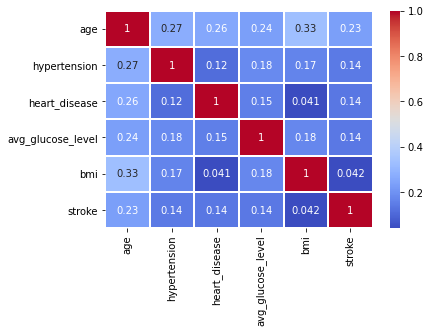

In [12]:
sns.heatmap(data_raw.corr(), cmap = 'coolwarm', annot=True, linewidths=1)

   Из корреляционный матрицы видно, что сильных корреляций (> 0.5) нет. 
   
   Самый большой для инсульта коэффицент корреляции - коэффициент между инсультом и возрастом.Зависимость между инсультом и гипертонией, уровнем глюкозы в крови, сердечными заболеваниями присутсвует, однако меньше, чем для возраста. Что касается зависимости между инсультом и индексом массы тела, то она почти нулевая 

   Что касается других корреляций, то наименьшая зависимость есть между сердечными заболеваниями и индексом массы тела (Возникает вопрос о корректности данных, поскольку исследования показывают обратную корреляцию). С возрастом имеется корреляция для всех категорий (повышенного давления, болезей сердца, повышенного уровня глюкозы, индексом массы тела, инсульта)

## Рассмотрю подробней числовые характеристики

Признаки "Gender"(нулевой столбец), "hypertension"(второй стобец), "heart_disease"(третий столбец), "ever_married" (четвертый столбец), "work_type" (пятый столбец), "Residence_type" (шестой столбец), "smoking_status" (9 столбец), "stroke" (10 столбец) являются категориальными.

In [13]:
data_raw.iloc[:,[0, 2, 3, 4, 5, 6, 9, 10]] = data_raw.iloc[:,[0, 2, 3, 4, 5, 6, 9, 10]].astype('category') # определила часть столбцов в категориальные данные (iloc - описывает столбцы)

Выведу описательную статичтику для количественных данных (age, avg_glucose_level, bmi)

In [14]:
data_num = data_raw
data_num = data_num.drop(['stroke'], axis = 1)
data_num.describe() # таблица будет отписывать среднее значение, стандартное отоклонение, минимальное и максимальное значение для каждого количественного признака

,age,avg_glucose_level,bmi
count,4908.000000,4908.000000,4908.00000
mean,42.868810,105.297402,28.89456
std,22.556128,44.425550,7.85432
min,0.080000,55.120000,10.30000
25%,25.000000,77.067500,23.50000
50%,44.000000,91.680000,28.10000
75%,60.000000,113.495000,33.10000
max,82.000000,271.740000,97.60000


Из таблицы видно, что у нас в данных есть люди,чей возраст слишком мал для анализа инсульта (min(age) = 0.08). Предположительно, люди меньше какого-то возраста с наличием инсульта будут выбросами на plt.scatter

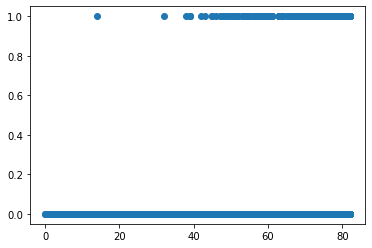

In [15]:
plt.scatter(data_raw['age'],data_raw['stroke'])

Мы видим, что на граффике есть выброс (у человека меньше 20 лет).

In [16]:
data_raw[data_raw['stroke']==1]['age'].nsmallest(20) # удаляю выброс (количество данных: (4908, 11)->(4907, 11))

245    14.0
182    32.0
118    38.0
49     39.0
210    39.0
228    39.0
31     42.0
79     43.0
63     45.0
94     45.0
113    45.0
180    46.0
88     47.0
34     48.0
213    48.0
3      49.0
39     49.0
224    49.0
15     50.0
106    50.0
Name: age, dtype: float64

In [17]:
data_raw.shape

(4908, 11)

In [18]:
# Не знаю, как лучше было сделать. Просто удалить выброс или удалить значения у всех людей, кто младше 20(?). Оставила первый вариант, т.к. он не такой грубый
# data_raw = data_raw[data_raw.age > 20] # удалю данные о людях меньше 20 лет
# data_raw.shape #(3908,11)

## После чистки данных хочу посмотреть на зависимость между возрастом и инстультом поподробней 

<AxesSubplot:xlabel='stroke', ylabel='age'>

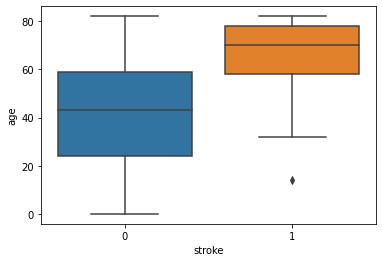

In [19]:
sns.boxplot(x="stroke", y="age", data = data_raw)

Из диаграммы видно, что отсутствие инсульта больше характерно для людей до 60 лет, при этом для второй подгруппы видно, что люди старше 60 лет больше склонны к инсульту.

Выведу матрицу корреляции для числовых значений

<AxesSubplot:>

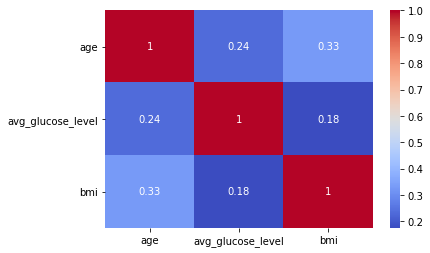

In [20]:
sns.heatmap(data_raw.corr(), cmap = 'coolwarm', annot=True)

Мы видим, что для этих числовых данных сохраняется корреляция. Самая больша между возрастом и индексом массы тела

## Посмотрим, сбалансированы ли наши данные 

<AxesSubplot:xlabel='stroke', ylabel='count'>

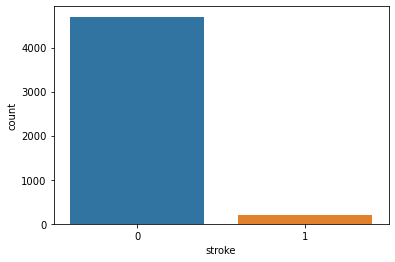

In [21]:
sns.countplot(x="stroke", data = data_raw)

Классы в задаче не сблансированы

## Рассмотрим подробней категориальные данные и зависимость инсульта от категориальных данных 

In [22]:
data_raw.describe(include = ['category'])

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,4908,4908,4908,4908,4908,4908,4908,4908
unique,2,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2897,4457,4665,3204,2810,2490,1852,4699


## Зависимость от типа работы

Можно предположить, что от типа работы может зависеть наличие или отсутсвие инсульта. Давайте проверим это

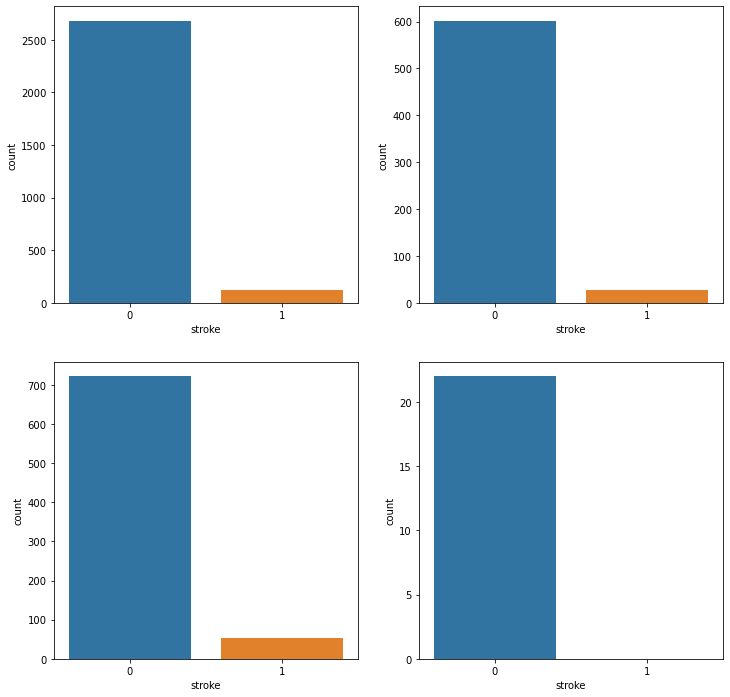

In [23]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

sns.countplot(ax=ax[0,0], data=data_raw[data_raw.work_type == 'Private'], x='stroke')
sns.countplot(ax=ax[0,1], data=data_raw[data_raw.work_type == 'Govt_job'], x='stroke')
sns.countplot(ax=ax[1,0], data=data_raw[data_raw.work_type == 'Self-employed'], x='stroke')
sns.countplot(ax=ax[1,1], data=data_raw[data_raw.work_type == 'Never_worked'], x='stroke')

plt.show()

В группе неработающих инсульта нет ;) И здесь мы можем вернуться к началу notebook, где приводилась статья, показывающая влияние переработки на риск возникновения инсульта. 

## Зависимость от места проживания (город/деревня)

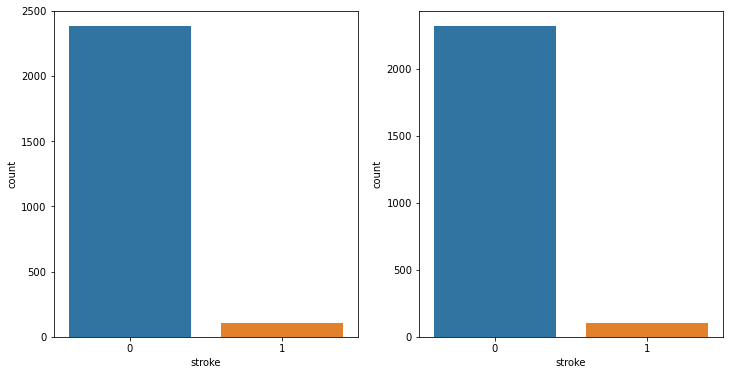

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(ax=ax[0], data=data_raw[data_raw.Residence_type == 'Urban'], x='stroke')
sns.countplot(ax=ax[1], data=data_raw[data_raw.Residence_type == 'Rural'], x='stroke')

plt.show()

Мы видим, что сильной разницы между наличием инсульта у двух разных подгрупп нет. Значит, мое начальное предположение о том, что жизнь в деревне сопуствует более активному образу жизни и, соотвественно, у таких людей меньше риск инсульта, был неверен.

## Зависимость от того, был ли человек женат или нет

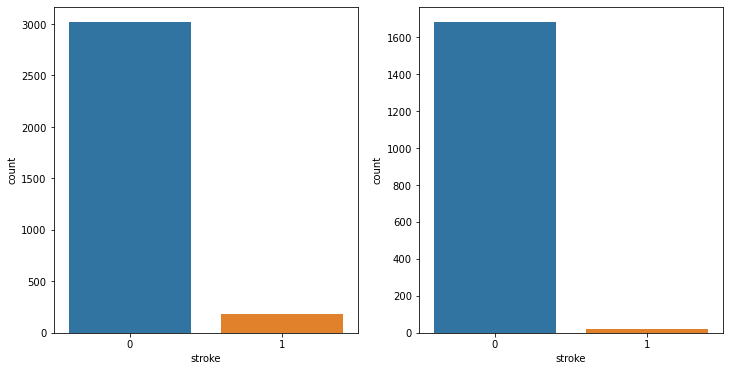

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(ax=ax[0], data=data_raw[data_raw.ever_married == 'Yes'], x='stroke')
sns.countplot(ax=ax[1], data=data_raw[data_raw.ever_married == 'No'], x='stroke')

plt.show()

Мы видим, что вероятность инсульта у тех, кто был женат выше, чем у тех, кто не был. 

## Зависимость от пола

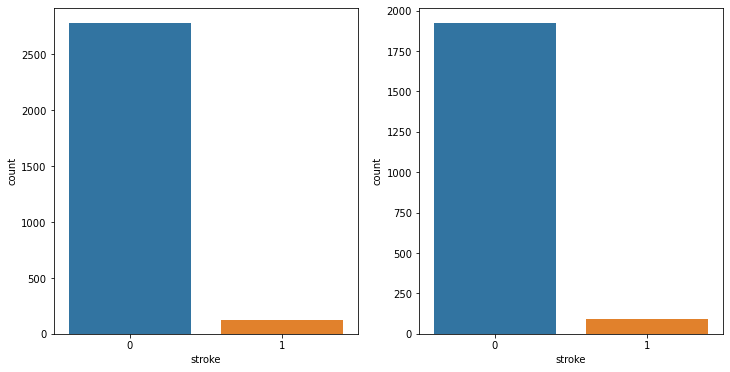

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(ax=ax[0], data=data_raw[data_raw.gender == 'Female'], x='stroke')
sns.countplot(ax=ax[1], data=data_raw[data_raw.gender == 'Male'], x='stroke')

plt.show()

Здесь также мы не видим разницы между группами наличия инсульта у мужчин и женщин

## Зависимость от статуса курения

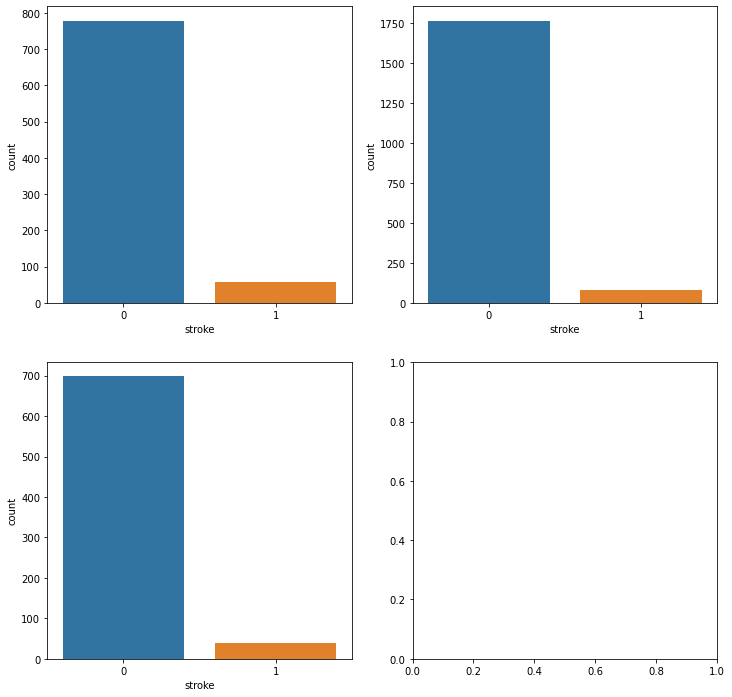

In [27]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

sns.countplot(ax=ax[0,0], data=data_raw[data_raw.smoking_status == 'formerly smoked'], x='stroke')
sns.countplot(ax=ax[0,1], data=data_raw[data_raw.smoking_status == 'never smoked'], x='stroke')
sns.countplot(ax=ax[1,0], data=data_raw[data_raw.smoking_status == 'smokes'], x='stroke')

plt.show()

Опять же здесь разницы между лидьми с разными статусами курения мы не видим разницы

# 4. Обработка категориальных признаков

## Обработка бинарных признаков

In [28]:
data_raw['ever_married'] = pd.factorize(data_raw['ever_married'])[0]
data_raw['Residence_type'] = pd.factorize(data_raw['Residence_type'])[0]
data_raw['heart_disease'] = pd.factorize(data_raw['heart_disease'])[0]
data_raw['hypertension'] = pd.factorize(data_raw['hypertension'])[0]
data_raw['gender'] = pd.factorize(data_raw['gender'])[0]

## Обработка небинарных признаков

Признаки 'work_type' и 'smoking_status' являются небинарными. Чтобы создать фиктивные переменные для переменной в кадре данных pandas, мы можем использовать функцию pandas.get_dummies()

In [29]:
Work_dummies = pd.get_dummies(data_raw['work_type']) # создаем фиктивные переменные 
Smoking_dummies = pd.get_dummies(data_raw['smoking_status'])

data_raw = pd.concat((data_raw, Work_dummies), axis=1) # объединяем созданные фиктивные переменные
data_raw = data_raw.drop(['work_type'], axis=1) # отбрасываем первый столбец фиктивной переменной
data_raw = pd.concat((data_raw, Smoking_dummies), axis=1)
data_raw = data_raw.drop(['smoking_status'], axis=1)
# аналогично можно было сделать в одну строчку data_raw = pd.get_dummies(data_raw, columns=['work_type', 'smoking_status',], drop_first=True)

In [30]:
data_raw

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,0,67.0,0,0,0,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,0,80.0,0,0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,1,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,1,0,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,0,81.0,0,1,0,0,186.21,29.0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,1,1,1,103.08,18.6,0,0,0,0,0,1,1,0,0,0
5106,1,81.0,0,1,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,1,35.0,0,1,0,1,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,0,51.0,0,1,0,1,166.29,25.6,0,0,0,1,0,0,0,1,0,0


Видим, что в таблице появились новые столбцы с фиктивными переменными.

# 5. Нормализация 

In [31]:
y = data_raw['stroke']
data_raw = data_raw.drop(['stroke'], axis = 1)

In [32]:
data_raw

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,0,67.0,0,0,0,0,228.69,36.6,0,0,1,0,0,0,1,0,0
2,0,80.0,0,0,0,1,105.92,32.5,0,0,1,0,0,0,0,1,0
3,1,49.0,0,1,0,0,171.23,34.4,0,0,1,0,0,0,0,0,1
4,1,79.0,1,1,0,1,174.12,24.0,0,0,0,1,0,0,0,1,0
5,0,81.0,0,1,0,0,186.21,29.0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,1,1,1,103.08,18.6,0,0,0,0,1,1,0,0,0
5106,1,81.0,0,1,0,0,125.20,40.0,0,0,0,1,0,0,0,1,0
5107,1,35.0,0,1,0,1,82.99,30.6,0,0,0,1,0,0,0,1,0
5108,0,51.0,0,1,0,1,166.29,25.6,0,0,1,0,0,0,1,0,0


In [33]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
x = data_stand
data_stand.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
count,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03,4.908000e+03
mean,4.011778e-16,-3.445116e-16,-4.302906e-15,-3.752251e-15,-1.479438e-15,-2.253925e-16,7.262358e-15,-1.396963e-15,3.440153e-16,2.859820e-17,-1.385336e-15,-3.454857e-16,9.332614e-16,1.310687e-15,1.467404e-16,5.319479e-16,-4.584081e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.200118e+00,-1.896993e+00,-3.180700e-01,-4.381052e+00,-7.291960e-01,-9.853357e-01,-1.129472e+00,-2.367431e+00,-3.837122e-01,-6.709503e-02,-1.157194e+00,-4.329860e-01,-3.979127e-01,-6.579548e-01,-4.530593e-01,-7.783942e-01,-4.203097e-01
25%,-1.200118e+00,-7.921932e-01,-3.180700e-01,2.282092e-01,-7.291960e-01,-9.853357e-01,-6.354429e-01,-6.868271e-01,-3.837122e-01,-6.709503e-02,-1.157194e+00,-4.329860e-01,-3.979127e-01,-6.579548e-01,-4.530593e-01,-7.783942e-01,-4.203097e-01
50%,8.330816e-01,5.015000e-02,-3.180700e-01,2.282092e-01,-7.291960e-01,-9.853357e-01,-3.065219e-01,-1.011622e-01,-3.837122e-01,-6.709503e-02,8.639833e-01,-4.329860e-01,-3.979127e-01,-6.579548e-01,-4.530593e-01,-7.783942e-01,-4.203097e-01
75%,8.330816e-01,7.594916e-01,-3.180700e-01,2.282092e-01,1.371094e+00,1.014676e+00,1.845244e-01,5.354302e-01,-3.837122e-01,-6.709503e-02,8.639833e-01,-4.329860e-01,-3.979127e-01,1.519552e+00,-4.530593e-01,1.284434e+00,-4.203097e-01
max,8.330816e-01,1.734836e+00,3.143321e+00,2.282092e-01,1.371094e+00,1.014676e+00,3.746551e+00,8.747472e+00,2.605589e+00,1.490120e+01,8.639833e-01,2.309073e+00,2.512602e+00,1.519552e+00,2.206767e+00,1.284434e+00,2.378713e+00


# 6. Разбиение на обучающую и тестовую выборку

Разобьем данные на обучающую и тестовую выборки в пропорции 4:1 (80% - обучающая выборка, 20% - тестовая):

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 73)

print(x_train.shape , x_test.shape)

(3926, 17) (982, 17)


# 7. Классификация KNN

## Выберу 7 ближайших соседей

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
y_train_predict = knn.predict(x_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.049923586347427405

In [37]:
y_test_predict = knn.predict(x_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.031568228105906315

## Выберу 6 ближайших соседей

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [39]:
y_train_predict = knn.predict(x_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.04610290371879776

In [40]:
y_test_predict = knn.predict(x_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.035641547861507125

## Выберу 5 ближайших соседей

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [44]:
y_train_predict = knn.predict(x_train)
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.04610290371879776

In [45]:
y_test_predict = knn.predict(x_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.03054989816700611

In [ ]:
При выборе 6 ближайших соседей у нас достигается наименьшая ошибка на тестовой выборке

/home/tatyanakhabarova/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


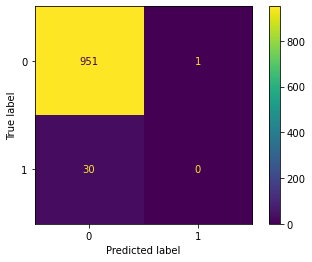

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)